In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel("Dados.xlsx")

In [3]:
dados.head()

,Marca,Modelo,Ano,Valor Venda,Mês de Venda
0,Audi,A4,2010,174408,agosto
1,Audi,A4,2010,107051,março
2,Audi,A4,2018,56003,junho
3,Audi,A4,2016,91751,abril
4,Audi,A4,2016,49872,julho


### Questão 1

a) Qual foi a venda média total que a loja teve no ano de 2019.

In [4]:
dados_2019 = dados[dados.Ano == 2019]

In [5]:
media = dados_2019["Valor Venda"].mean()

print("Média de vendas = R$ {0:.2f}".format(media))

Média de vendas = R$ 119011.29


b) Qual foi o desvio padrão das vendas totais da loja no ano de 2019.

In [6]:
dp_2019 = dados_2019["Valor Venda"].std()

print("desvio padrão = R$ {0:.2f}".format(dp_2019))

desvio padrão = R$ 35879.60


c) A partir da venda média total (Resposta do item a). Quantos automóveis apresentaram valor de venda superior ao valor médio?

In [7]:
# automoveis com valor de venda superior ao medio 
superior = dados[(dados["Valor Venda"] > 119011.29166666667 )]

contagem = superior.shape[0]
print("A quantidade de automóveis com valor de venda maior que o médio é {}".format(contagem))

A quantidade de automóveis com valor de venda maior que o médio é 105


d) Quantos automóveis Audi A3 forem vendidos no mês de abril? 

In [8]:
dados_abril = dados[dados["Mês de Venda"] == "abril"]

dados_abril_A3 = dados_abril[dados_abril.Modelo == "A3"]

print("A quantidade de carros Audi A3 vendidos no mês em questão é igual a {}".format(dados_abril_A3.shape[0]))

A quantidade de carros Audi A3 vendidos no mês em questão é igual a 10


e) Quantos automóveis Audi A4 foram vendidos no mês de dezembro?

In [9]:
dados_abril = dados[dados["Mês de Venda"] == "dezembro"]

dados_abril_A4 = dados_abril[dados_abril.Modelo == "A4"]

print("A quantidade de carros Audi A4 vendidos no mês em questão é igual a {}".format(dados_abril_A4.shape[0]))

A quantidade de carros Audi A4 vendidos no mês em questão é igual a 5


f) Preencha a tabela abaixo com a quantidade (Absoluta) de automóveis vendidos no ano de 2019 segmentado pelos modelos A3; A4; A5? (Responda nessa sequência)

In [10]:
dados_2019.Modelo.value_counts()

A3    17
A4     5
A5     2
Name: Modelo, dtype: int64

g) Preencha a tabela abaixo com a quantidade em termos percentuais (Relativo) de automóveis vendidos no ano de 2019 segmentado pelos modelos A3; A4; A5? (Responda nessa sequência)

In [11]:
100 * dados_2019.Modelo.value_counts() / len(dados_2019.Modelo)

A3    70.833333
A4    20.833333
A5     8.333333
Name: Modelo, dtype: float64

h) Qual foi o mês com a maior quantidade de vendas no ano?

In [12]:
vendas2019 = (dados_2019["Mês de Venda"].value_counts())

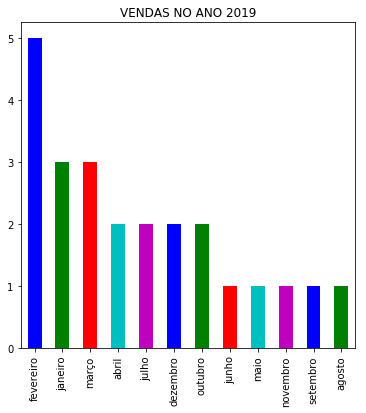

In [13]:
vendas2019.plot(kind='bar',title='VENDAS NO ANO 2019',figsize=(6, 6), color=('b','g','r','c','m'))

In [14]:
print("De acordo com o gráfico, nota-se que o mês em 2019 que tem maior quantidade é o mês de Fevereiro")

De acordo com o gráfico, nota-se que o mês em 2019 que tem maior quantidade é o mês de Fevereiro


In [15]:
# contagem de vendas ao longo de todos os anos 
ctgVendas = dados.groupby(["Mês de Venda"]).count()

ctgVendas = ctgVendas.drop(columns=['Modelo', 'Ano', 'Valor Venda'])
ctgVendas = ctgVendas.rename(columns={'Marca': 'contagem de vendas'})
ctgVendas;

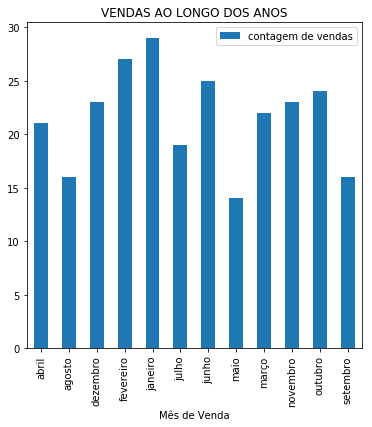

In [16]:
ctgVendas.plot(kind='bar',title='VENDAS AO LONGO DOS ANOS',figsize=(6, 6))

i) Qual foi o mês em que a loja obteve maior faturamento?

In [17]:
faturamento = dados.groupby(["Mês de Venda"]).sum()
faturamento = faturamento.drop('Ano', 1)
faturamento

,Valor Venda
Mês de Venda,
abril,2383758
agosto,1660915
dezembro,2746511
fevereiro,3010835
janeiro,3557149
julho,2298865
junho,2549705
maio,1703688
março,1970881


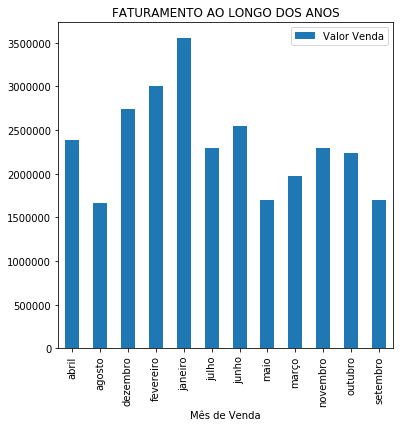

In [18]:
faturamento.plot(kind='bar',title='FATURAMENTO AO LONGO DOS ANOS',figsize=(6, 6))

j) Preencha a tabela abaixo com as respectivas vendas medias mensais: 

In [19]:
medias_mensais = dados.groupby(["Mês de Venda"]).mean()
medias_mensais = medias_mensais.drop('Ano', 1)
medias_mensais = medias_mensais.rename(columns={'Valor Venda': 'Média das vendas'})

medias_mensais

,Média das vendas
Mês de Venda,
abril,113512.285714
agosto,103807.187500
dezembro,119413.521739
fevereiro,111512.407407
janeiro,122660.310345
julho,120992.894737
junho,101988.200000
maio,121692.000000
março,89585.500000


k) Preencha a tabela abaixo com as respectivas vendas medias mensais do primeiro semestre de 2019 (de Janeiro a Julho)

In [20]:
dados_2019.head()

,Marca,Modelo,Ano,Valor Venda,Mês de Venda
5,Audi,A4,2019,102446,janeiro
7,Audi,A4,2019,151238,dezembro
44,Audi,A4,2019,173047,julho
55,Audi,A4,2019,103382,março
66,Audi,A4,2019,81337,fevereiro


In [37]:
medias2019 = dados_2019.set_index('Mês de Venda')
medias2019 = medias2019.loc[['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho']]
medias2019;

In [35]:
# para o A3 
medias2019_A3 = medias2019[medias2019.Modelo == "A3"]
medias2019_A3;

In [30]:
medias2019_A3 = medias2019_A3.groupby(["Mês de Venda"]).mean()
medias2019_A3 = medias2019_A3.drop('Ano', 1)
medias2019_A3= medias2019_A3.rename(columns={'Valor Venda': 'Média das vendas 2019 - A3'})

medias2019_A3

,Média das vendas 2019 - A3
Mês de Venda,
abril,90119.5
fevereiro,97252.0
janeiro,138178.0
julho,125657.0
junho,84676.0
maio,103557.0
março,133407.0


In [31]:
# PARA A4

medias2019_A4 = medias2019[medias2019.Modelo == "A4"]

medias2019_A4 = medias2019_A4.groupby(["Mês de Venda"]).mean()
medias2019_A4 = medias2019_A4.drop('Ano', 1)
medias2019_A4 = medias2019_A4.rename(columns={'Valor Venda': 'Média das vendas 2019 - A4'})

medias2019_A4

,Média das vendas 2019 - A4
Mês de Venda,
fevereiro,81337
janeiro,102446
julho,173047
março,103382


In [32]:
# PARA A5

medias2019_A5 = medias2019[medias2019.Modelo == "A5"]

medias2019_A5 = medias2019_A5.groupby(["Mês de Venda"]).mean()
medias2019_A5 = medias2019_A5.drop('Ano', 1)
medias2019_A5 = medias2019_A5.rename(columns={'Valor Venda': 'Média das vendas 2019 - A5'})

medias2019_A5

,Média das vendas 2019 - A5
Mês de Venda,
fevereiro,156696
janeiro,217372
